In [ ]:
from ete3 import NCBITaxa
from Bio import Phylo
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd

In [14]:
df = pd.read_csv("org_ncbi_ids.txt")
df = df.dropna()
ncbi_ids = df.ncbid.unique().astype(int)

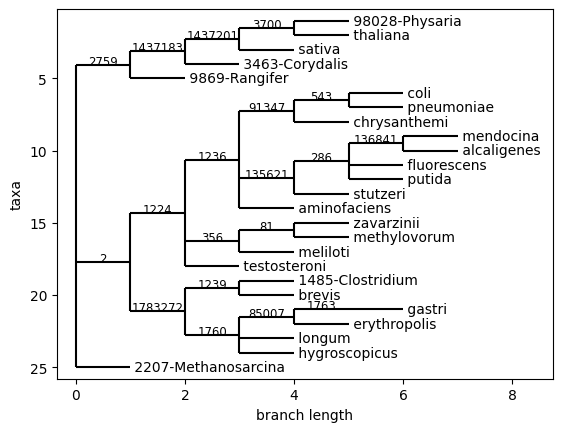

In [19]:
ncbi = NCBITaxa()

name_dict = ncbi.get_taxid_translator(ncbi_ids)
tree = ncbi.get_topology(ncbi_ids)

for leaf in tree:
    leaf.name = leaf.name + "-" + name_dict[int(leaf.name)]

newick_str = tree.write(format=1)

tree = Phylo.read(StringIO(newick_str), "newick")

Phylo.draw(tree)
plt.show()

In [21]:
for taxid in ncbi_ids:
    lineage = ncbi.get_lineage(taxid)
    names = ncbi.get_taxid_translator(lineage)
    lineage_names = [names[taxid] for taxid in lineage]
    print(f"NCBI ID: {taxid}, Lineage: {'; '.join(lineage_names)}")
    print("---")

NCBI ID: 3702, Lineage: root; cellular organisms; Eukaryota; Viridiplantae; Streptophyta; Streptophytina; Embryophyta; Tracheophyta; Euphyllophyta; Spermatophyta; Magnoliopsida; Mesangiospermae; eudicotyledons; Gunneridae; Pentapetalae; rosids; malvids; Brassicales; Brassicaceae; Camelineae; Arabidopsis; Arabidopsis thaliana
---
NCBI ID: 303, Lineage: root; cellular organisms; Bacteria; Pseudomonadota; Gammaproteobacteria; Pseudomonadales; Pseudomonadaceae; Pseudomonas; Pseudomonas putida group; Pseudomonas putida
---
NCBI ID: 216816, Lineage: root; cellular organisms; Bacteria; Terrabacteria group; Actinomycetota; Actinomycetes; Bifidobacteriales; Bifidobacteriaceae; Bifidobacterium; Bifidobacterium longum
---
NCBI ID: 9869, Lineage: root; cellular organisms; Eukaryota; Opisthokonta; Metazoa; Eumetazoa; Bilateria; Deuterostomia; Chordata; Craniata; Vertebrata; Gnathostomata; Teleostomi; Euteleostomi; Sarcopterygii; Dipnotetrapodomorpha; Tetrapoda; Amniota; Mammalia; Theria; Eutheria; 